<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/REDES_CONVULOCIONALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REDES CONVOLUCIONALES CNN**

Las Redes Neuronales Convolucionales (CNN) son ideales para trabajar con datos visuales (imágenes).
Se aplican en:

Área	Aplicaciones
Visión por computadora	Reconocimiento facial, detección de objetos, clasificación de imágenes
Medicina	Diagnóstico con imágenes (rayos X, resonancias)
Automóviles	Visión para vehículos autónomos
Seguridad	Vigilancia, biometría (huellas, iris)
Industria	Inspección de defectos en líneas de prod

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.7978 - loss: 0.5768 - val_accuracy: 0.8891 - val_loss: 0.3089
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8947 - loss: 0.2940 - val_accuracy: 0.9013 - val_loss: 0.2768
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9115 - loss: 0.2433 - val_accuracy: 0.8982 - val_loss: 0.2857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9206 - loss: 0.2169 - val_accuracy: 0.8993 - val_loss: 0.2728
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9298 - loss: 0.1887 - val_accuracy: 0.9114 - val_loss: 0.2492
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9044 - loss: 0.2674

Precisión en test: 0.90
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


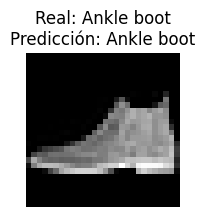

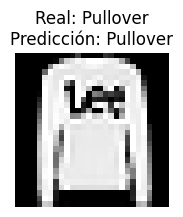

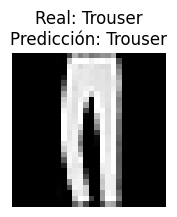

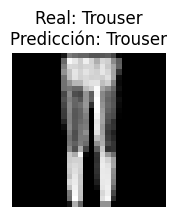

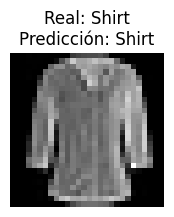

In [ ]:
# Paso 1: Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Paso 2: Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Paso 3: Normalizar imágenes y adaptar formato a 4D (batch, altura, ancho, canales)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # imagen en escala de grises
x_test = x_test.reshape(-1, 28, 28, 1)

# Paso 4: Construir la CNN
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases
])

# Paso 5: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 6: Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nPrecisión en test: {test_acc:.2f}")

# Paso 8: Visualizar predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = model.predict(x_test)

# Mostrar las 5 primeras imágenes
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Real: {class_names[y_test[i]]}\nPredicción: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
